<a href="https://colab.research.google.com/github/laurenquattrocchi/MusiCAPPture/blob/main/Exploratory_Data_Analysis_ML_Music_Genre_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

pd.set_option('display.max_rows', 500)
pd.options.display.width = 0

my_drive = '/content/drive/My Drive/ML_Project/'

data = pd.read_csv(f'{my_drive}features_3_sec.csv')
data2 = pd.read_csv(f'{my_drive}features_30_sec.csv')


Mounted at /content/drive


In [ ]:
len(data)

9990

In [ ]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
from scipy.io import wavfile
general_path = '/content/drive/My Drive/ML_Project'


In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')


In [ ]:
jazz, jazz_sr = librosa.load('/content/drive/My Drive/ML_Project/data_genres_original_jazz_jazz.00000.wav')

print('y:', jazz, '\n')
print('y shape:', np.shape(jazz), '\n')
print('Sample Rate (KHz):', jazz_sr, '\n')


y: [-0.00924683 -0.01177979 -0.01370239 ...  0.0071106   0.00561523
  0.00561523] 

y shape: (661794,) 

Sample Rate (KHz): 22050 



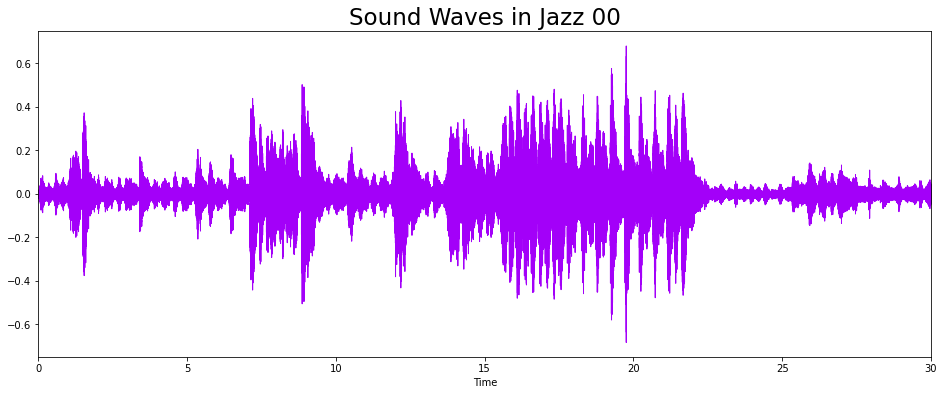

In [ ]:
audio_file, _ = librosa.effects.trim(jazz)

plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = jazz_sr, color = "#A300F9");
plt.title("Sound Waves in Jazz 00", fontsize = 23);

# reference
#https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification


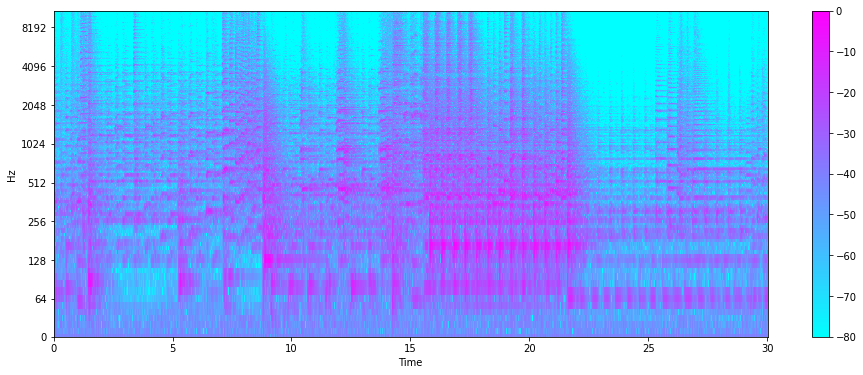

In [ ]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
jazz_D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

DB = librosa.amplitude_to_db(jazz_D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = jazz_sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool')
plt.colorbar();


In [ ]:
country, country_sr = librosa.load('/content/drive/My Drive/ML_Project/data_genres_original_country_country.00000.wav')

print('y:', country, '\n')
print('y shape:', np.shape(country), '\n')
print('Sample Rate (KHz):', country_sr, '\n')


y: [-0.13415527 -0.19485474 -0.04257202 ...  0.2260437   0.15042114
  0.04238892] 

y shape: (663300,) 

Sample Rate (KHz): 22050 



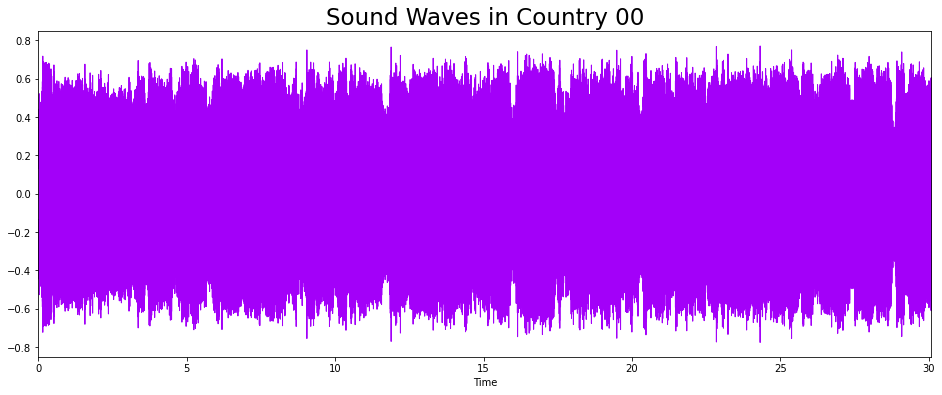

In [ ]:
audio_file_country, _ = librosa.effects.trim(country)

plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file_country, sr = country_sr, color = "#A300F9");
plt.title("Sound Waves in Country 00", fontsize = 23);

# reference
#https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification


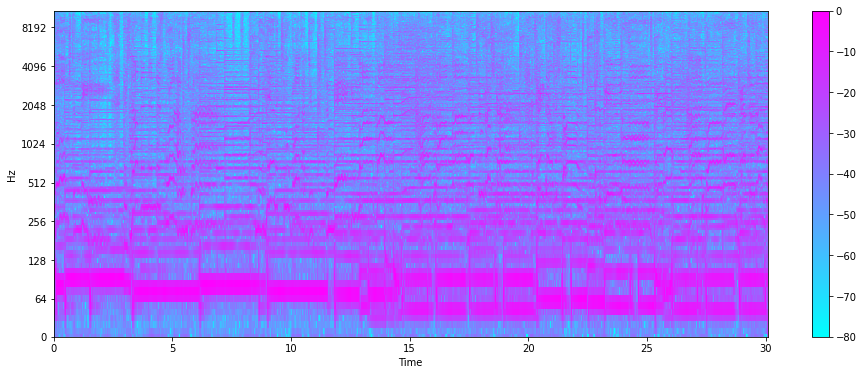

In [ ]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
country_D = np.abs(librosa.stft(audio_file_country, n_fft = n_fft, hop_length = hop_length))

DB = librosa.amplitude_to_db(country_D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = country_sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool')
plt.colorbar();


In [ ]:
normalized_data=(data-data.mean())/data.std()
normalized_data['label'] = data['label']
normalized_data['filename'] = data['filename']
normalized_data['length'] = data['length']
data_groups = normalized_data.groupby(['label']).mean()
data_groups


,chroma_stft_mean,chroma_stft_var,harmony_mean,harmony_var,length,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,...,rms_var,rolloff_mean,rolloff_var,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_centroid_mean,spectral_centroid_var,tempo,zero_crossing_rate_mean,zero_crossing_rate_var
label,,,,,,,,,,,,,,,,,,,,,
blues,-0.410052,0.516220,-0.053204,0.081384,66149.0,0.120800,0.088295,-0.544891,0.124253,-0.059153,...,-0.014577,-0.568286,-0.237695,-0.570992,-0.228370,-0.629308,-0.393307,0.054782,-0.534262,-0.341012
classical,-1.271485,-0.157051,0.070210,-0.754792,66149.0,-0.643170,-0.215781,-0.080432,0.128084,-0.591112,...,-0.634009,-1.272945,-0.849501,-1.327293,-0.695432,-1.127735,-0.795105,0.030420,-0.565247,-0.583749
country,-0.381785,0.049416,0.206565,0.018532,66149.0,-0.173161,0.213665,-0.122384,0.060486,-0.199803,...,-0.363802,-0.382205,-0.037346,-0.266576,0.086648,-0.409693,-0.202166,-0.115234,-0.440789,-0.320851
disco,0.407255,-0.152376,0.065877,-0.240199,66149.0,0.316185,-0.167814,-0.136227,-0.106912,0.118235,...,0.017406,0.577670,0.052088,0.498240,0.070568,0.556041,0.114655,-0.065434,0.558642,0.176919
hiphop,0.829659,0.201188,0.106737,0.575009,66149.0,0.200881,0.402195,0.462835,0.326570,0.324366,...,1.109995,0.463815,0.454187,0.498108,0.347151,0.428668,0.660335,0.031919,0.095170,0.565825
jazz,-0.906577,0.327006,-0.213213,-0.359847,66149.0,-0.447004,-0.499457,0.196606,-0.362445,-0.279766,...,-0.413206,-0.500194,-0.308269,-0.407502,-0.280051,-0.543901,-0.482680,-0.058196,-0.577606,-0.415044
metal,1.112337,-1.297773,-0.120417,0.083837,66149.0,1.001254,-0.502066,-0.654958,-0.529117,1.149298,...,-0.450860,0.339619,-0.653920,0.002636,-0.591135,0.534224,-0.535895,0.003041,0.951881,-0.256501
pop,0.205100,0.291743,0.221366,0.867313,66149.0,-0.478726,0.349253,0.550110,0.200615,-0.623119,...,1.063827,1.267644,0.736692,1.407393,0.401671,1.158158,1.056241,-0.053094,0.650388,1.025183
reggae,0.325540,0.460532,-0.230147,-0.124345,66149.0,-0.032948,0.627551,0.621689,0.504072,0.043811,...,0.055342,0.012705,0.856682,0.125789,0.884753,-0.022618,0.669868,0.276209,-0.260911,0.282301


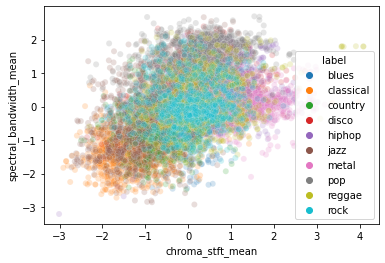

In [ ]:
normalized_data_means = normalized_data[[col for col in data.columns if 'mean' in col]]

pca = PCA(n_components=3)
pca.fit(normalized_data_means)
#plt.plot(pca.components_)
#print(pca.fit(normalized_data_means))
pca.components_
normalized_data_means_abr = normalized_data[['chroma_stft_mean', 'spectral_bandwidth_mean', 'mfcc1_mean', 'label']]
sns.scatterplot(x = 'chroma_stft_mean', y = 'spectral_bandwidth_mean', data=normalized_data_means_abr, hue='label', alpha=.2)



No handles with labels found to put in legend.


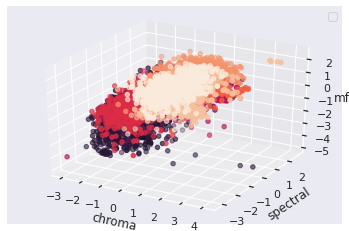

In [ ]:
df = normalized_data_means_abr
df['label'] = pd.factorize(df['label'])[0]

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['chroma_stft_mean']
y = df['spectral_bandwidth_mean']
z = df['mfcc1_mean']

ax.set_xlabel("chroma")
ax.set_ylabel("spectral")
ax.set_zlabel("mfcc")

ax.scatter(x, y, z, c=df['label'])
ax.legend()
plt.show()

In [ ]:
df

,chroma_stft_mean,spectral_bandwidth_mean,mfcc1_mean,label
0,-0.487783,-0.493959,0.251716,0
1,-0.403122,-0.425361,0.186311,0
2,-0.361676,-0.288351,0.121953,0
3,-0.175705,-0.517319,0.255443,0
4,-0.485870,-0.538530,0.370633,0
...,...,...,...,...
9985,-0.336125,-0.961064,-0.747231,9
9986,-0.077044,-0.615822,-0.445084,9
9987,-0.354313,-1.249465,-1.337783,9
9988,0.088357,-0.410072,-0.161897,9


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 <a list of 28 Text major ticklabel objects>)

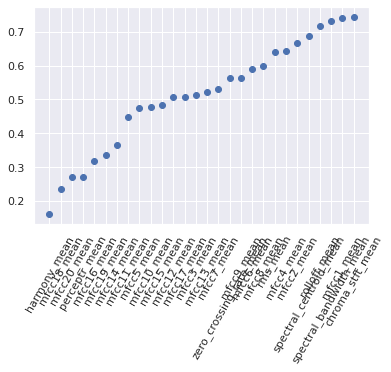

In [ ]:
data_mean_columns = data_groups[[col for col in data.columns if 'mean' in col]]
plt.plot(data_mean_columns.std().sort_values(), linestyle="",marker="o")
plt.xticks(rotation=60)

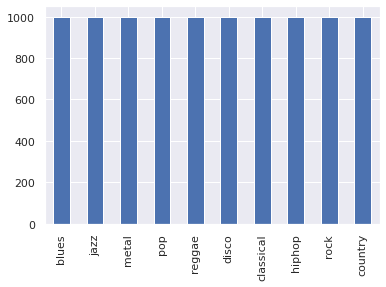

In [ ]:
data['label'].value_counts().plot(kind='bar')
#data.apply(pd.Series.value_counts).T.plot.bar()

Exploring the Numerical Data

Exploring the .wav Data

In [ ]:
from scipy.io import wavfile
samplerate, data = wavfile.read('./output/audio.wav')

FileNotFoundError: ignored

Exploring the .png Data

In [ ]:
from scipy import misc
import imageio
f = misc.face()
imageio.imsave('face.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

# Decision Tree Classifier

In [ ]:
import random
def randomize_feature_in(data, feat_num):
  feature_lst = set()
  feat_num = 4
  while len(feature_lst) < feat_num:
    feature_lst.add(random.randint(1, len(data.columns)-2))
  return list(feature_lst)

In [ ]:
# get accuracy for using different number of features
# next step see which combination of features gives best accuracy just taking in column order at this point
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
y = data['label']
feat_num = [4, 10, 15, 20, 30, 40, 50,59]
acc_entropy = {}
acc_gini = {}
cols = data.columns
for feat in feat_num:
  acc_entropy [feat] = []
  acc_gini[feat] = []
  features = {}
  for i in range(5): #run 5 times with shuffle for each feature number
      feat_ind = randomize_feature_in(data, feat_num)
      features[feat]=(feat_ind)
      X = data.iloc[:,feat_ind]
      X_train, X_test, y_train, y_test = train_test_split(X, y)
      clf1 = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
      clf2 = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)
      y_hat1 = clf1.predict(X_test)
      y_hat2 = clf2.predict(X_test)
      accuracy1 = sum(y_hat1 == y_test)/len(y_test)
      accuracy2 = sum(y_hat2 == y_test)/len(y_test)
      acc_entropy[feat].append(accuracy1)
      acc_gini[feat].append(accuracy2)

print('entropy:', acc_entropy)
print('gini:', acc_gini)

entropy: {4: [0.2714171337069656, 0.34467574059247397, 0.3498799039231385, 0.23939151321056845, 0.27181745396317053], 10: [0.2806244995996797, 0.24979983987189752, 0.2986389111289031, 0.33506805444355486, 0.322257806244996], 15: [0.24619695756605284, 0.36188951160928745, 0.3546837469975981, 0.2790232185748599, 0.24579663730984788], 20: [0.3366693354683747, 0.44515612489991996, 0.2702161729383507, 0.3078462770216173, 0.25740592473979185], 30: [0.32906325060048036, 0.2610088070456365, 0.27061649319455566, 0.2990392313851081, 0.3278622898318655], 40: [0.41232986389111287, 0.344275420336269, 0.3278622898318655, 0.367093674939952, 0.2409927942353883], 50: [0.27301841473178545, 0.27822257806244993, 0.3402722177742194, 0.31505204163330663, 0.32425940752602084], 59: [0.34307445956765414, 0.34947958366693355, 0.20736589271417133, 0.489191353082466, 0.33466773418734985]}
gini: {4: [0.26301040832666134, 0.34867894315452364, 0.3610888710968775, 0.24859887910328263, 0.2806244995996797], 10: [0.2806

In [ ]:
clf1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
gini_max_acc = {}
for key,val in acc_gini.items():
  gini_max_acc[key] = max(val)

print(gini_max_acc)

In [ ]:
entropy_max_acc = {}
for key,val in acc_entropy.items():
  entropy_max_acc[key] = max(val)
print(entropy_max_acc)

In [ ]:
import matplotlib.pyplot as plt
x1 = []
y1 = []
x2 = []
y2 = []
for key, val in entropy_max_acc.items():
    x1.append(key)
    y1.append(val)
for key, val in gini_max_acc.items():
    x2.append(key)
    y2.append(val)
plt.plot(x1,y1, label = 'entropy')
plt.plot(x2,y2, label = 'gini')
plt.ylabel('accuracy')
plt.xlabel('number of features')
plt.legend(loc="lower right", fontsize=10)
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[ 61,  23,  27,  18,  20,  26,  25,  13,  17,  26],
       [ 30, 149,  13,   7,   5,  22,  12,   6,   2,  10],
       [ 29,  11,  57,  19,  11,  26,  23,  25,  21,  30],
       [ 27,   4,  21,  85,  25,  18,  19,  15,  16,  21],
       [ 26,   6,  13,  27,  77,  21,   8,  38,  26,  23],
       [ 31,  27,  35,  26,  18,  53,  18,  14,   2,  28],
       [ 23,  12,  20,   8,   8,  10, 132,   4,   4,  28],
       [ 16,   4,  18,  17,  22,  15,   7,  74,  25,  23],
       [ 24,  10,  19,  16,  34,  12,   2,  20,  98,  21],
       [ 28,  13,  17,  26,  17,  24,  14,  33,  18,  50]])

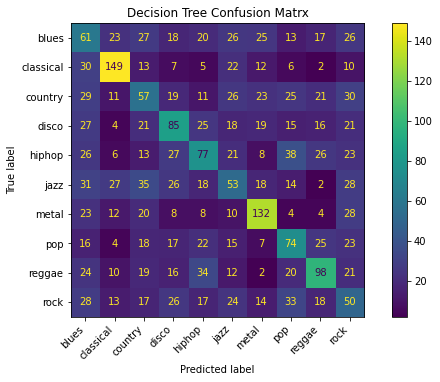

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
import sklearn
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Decision Tree Confusion Matrx')
disp = sklearn.metrics.plot_confusion_matrix(clf1, X_test, y_test, ax = ax)
fig.autofmt_xdate(rotation=45)
disp.confusion_matrix

In [ ]:
len(y_train)

7492

In [ ]:
import sklearn
labels= ['jazz', 'classical', 'rock', 'pop', 'metal', 'disco', 'blues',
       'hiphop', 'reggae', 'country']
cm = sklearn.metrics.confusion_matrix(y_test, y_hat1, labels=['jazz', 'classical', 'rock', 'pop', 'metal', 'disco', 'blues',
       'hiphop', 'reggae', 'country'], sample_weight=None, normalize=None)
pd.DataFrame(cm, index=labels, columns=labels)


,jazz,classical,rock,pop,metal,disco,blues,hiphop,reggae,country
jazz,52,63,23,12,23,21,18,10,8,16
classical,45,93,21,8,17,11,24,9,4,20
rock,26,30,40,20,40,31,24,16,16,19
pop,14,12,10,68,7,35,10,25,36,20
metal,26,31,51,11,79,25,14,20,9,17
disco,20,10,30,24,28,30,30,24,20,30
blues,21,20,27,30,13,29,31,16,25,24
hiphop,10,5,17,34,14,24,23,53,33,22
reggae,10,4,16,39,12,22,28,45,52,34
country,24,13,20,22,19,30,27,27,31,26


In [ ]:
import sklearn
labels= ['jazz', 'classical', 'rock', 'pop', 'metal', 'disco', 'blues',
       'hiphop', 'reggae', 'country']
cm = sklearn.metrics.confusion_matrix(y_test, y_hat2, labels=['jazz', 'classical', 'rock', 'pop', 'metal', 'disco', 'blues',
       'hiphop', 'reggae', 'country'], sample_weight=None, normalize=None)
pd.DataFrame(cm, index=labels, columns=labels)

AttributeError: ignored

In [ ]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.8 MB 4.4 MB/s 
     |████████████████████████████████| 511.7 MB 5.7 kB/s 
     |████████████████████████████████| 1.6 MB 31.8 MB/s 
     |████████████████████████████████| 438 kB 59.1 MB/s 
     |████████████████████████████████| 5.8 MB 42.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Unins

In [ ]:
# Load TensorFlow Decision Forests
import tensorflow_decision_forests as tfdf

In [ ]:
binary_genres = ['jazz', 'country']
filter = data[data['label'].isin(binary_genres)] 
filter = filter.drop(labels = 'filename', axis = 1)

sample, feature = filter.shape
print("GTZAN data shape", data.shape)
print("filtered for Jazz and Country", filter.shape)

GTZAN data shape (9990, 60)
filtered for Jazz and Country (1997, 59)


In [ ]:
filter.columns.values.tolist()
filter.head()


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
1998,66149,0.352965,0.094794,0.262712,0.000469,2889.033882,517534.579065,3097.759833,103379.112512,6933.939866,...,54.491550,1.826239,26.665237,4.337993,80.000572,-4.079638,26.598106,-4.989009,39.377224,country
1999,66149,0.368882,0.079485,0.253103,0.000462,2923.642044,677882.010775,2980.390524,112573.950167,6561.498272,...,25.260183,-4.711288,34.468616,-2.017675,38.114944,-3.221487,75.626251,4.634228,69.820641,country
2000,66149,0.398471,0.087208,0.257510,0.000676,2569.667856,319635.011600,2681.122207,194246.012920,5700.998347,...,26.561050,-4.522173,19.792542,-3.657425,20.629700,-3.879057,36.701496,4.368848,52.461636,country
2001,66149,0.351768,0.083145,0.256280,0.000341,2801.592480,520889.381627,2883.187737,118382.818900,6337.552960,...,14.872700,-0.354260,55.044071,-0.915363,45.356438,-0.841100,52.578453,3.443989,54.282154,country
2002,66149,0.355164,0.078153,0.248697,0.000651,2686.101149,189779.184877,2660.662652,50725.003041,5562.440467,...,55.495899,1.003073,73.283043,7.345280,100.114281,7.012424,67.456627,7.914930,87.967186,country


In [ ]:
from sklearn.model_selection import train_test_split

y_genre_df, music_df  = filter['label'], filter
train_x, test_x, train_y, test_y = train_test_split(music_df, y_genre_df, test_size=0.2, random_state=123)

print("train dataset", train_x.shape)
print("test dataset", test_x.shape)

train dataset (1597, 59)
test dataset (400, 59)


In [ ]:
# Convert the pandas dataframe into a TensorFlow dataset
dataset_tensor = tfdf.keras.pd_dataframe_to_tf_dataset(train_x, label="label")

# Train the model
model = tfdf.keras.RandomForestModel()
model.fit(dataset_tensor)

Use /tmp/tmp2h1eanki as temporary training directory
Reading training dataset...
Training dataset read in 0:00:05.360416. Found 1597 examples.
Training model...
Model trained in 0:00:01.665823
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [ ]:
# Convert it to a TensorFlow dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_x, label="label")

# Evaluate the model
model.compile(metrics=["accuracy"])
print(model.evaluate(test_ds))

1/1 [==============================] - 1s 586ms/step - loss: 0.0000e+00 - accuracy: 0.9500
[0.0, 0.949999988079071]


In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0)

# reference 
# https://blog.tensorflow.org/2021/05/introducing-tensorflow-decision-forests.html

In [ ]:
model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (58):
	chroma_stft_mean
	chroma_stft_var
	harmony_mean
	harmony_var
	length
	mfcc10_mean
	mfcc10_var
	mfcc11_mean
	mfcc11_var
	mfcc12_mean
	mfcc12_var
	mfcc13_mean
	mfcc13_var
	mfcc14_mean
	mfcc14_var
	mfcc15_mean
	mfcc15_var
	mfcc16_mean
	mfcc16_var
	mfcc17_mean
	mfcc17_var
	mfcc18_mean
	mfcc18_var
	mfcc19_mean
	mfcc19_var
	mfcc1_mean
	mfcc1_var
	mfcc20_mean
	mfcc20_var
	mfcc2_mean
	mfcc2_var
	mfcc3_mean
	mfcc3_var
	mfcc4_mean
	mfcc4_var
	mfcc5_mean
	mfcc5_var
	mfcc6_mean
	mfcc6_var
	mfcc7_mean
	mfcc7_var
	mfcc8_mean
	mfcc8_var
	mfcc9_mean
	mfcc9_var
	perceptr_mean
	perceptr_var
	rms_mean
	rms_var
	rolloff_mean
	rolloff_var
	spe